C:\Users\otsuka\AppData\Local\Temp\ipykernel_13412\1624535252.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, positions=range(len(sorted_stories)), patch_artist=True, labels=labels, vert=False)


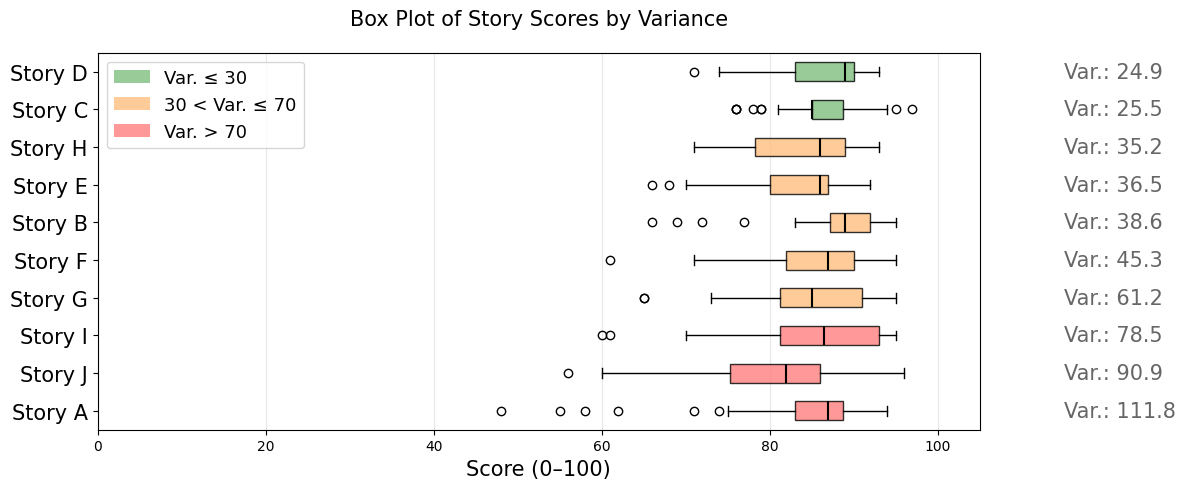

C:\Users\otsuka\AppData\Local\Temp\ipykernel_13412\1624535252.py:131: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, positions=range(len(sorted_stories)), patch_artist=True, labels=labels, vert=False)


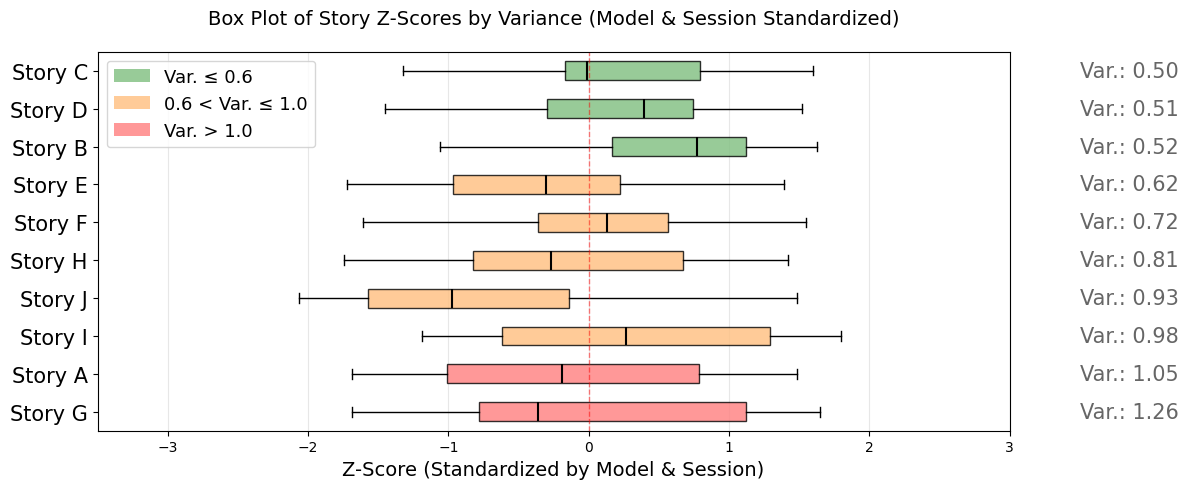

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# ------------------------------
# Figure A-2: Raw Score Variance
# ------------------------------

# Load data
df = pd.read_csv('official_row_data.csv', encoding='utf-8')
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Compute variance and flatten scores per story
story_variances = {}
flattened_data = {}

for story in df['story'].unique():
    scores = df[df['story'] == story]['score'].values
    variance = np.var(scores, ddof=1)
    story_variances[story] = variance
    flattened_data[story] = scores.tolist()

# Sort stories by descending variance
sorted_stories = sorted(story_variances, key=story_variances.get, reverse=True)

# Categorize diversity
def get_diversity_category(variance):
    if variance > 70:
        return "high"
    elif variance > 30:
        return "mid"
    else:
        return "low"

color_map = {
    "high": "#FF7F7F",
    "mid": "#FFBF7F",
    "low": "#7FBF7F"
}

boxplot_data = []
colors = []
labels = []
variance_labels = []

for story in sorted_stories:
    boxplot_data.append(flattened_data[story])
    category = get_diversity_category(story_variances[story])
    colors.append(color_map[category])
    labels.append(story)
    variance_labels.append(f"Var.: {story_variances[story]:.1f}")

fig, ax = plt.subplots(figsize=(12, 5))
bp = ax.boxplot(boxplot_data, positions=range(len(sorted_stories)), patch_artist=True, labels=labels, vert=False)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

for i, label in enumerate(variance_labels):
    ax.text(115, i, label, verticalalignment='center', fontsize=15, color='#666666')

ax.grid(True, axis='x', alpha=0.3)
ax.set_xlim(0, 105)
ax.set_xlabel('Score (0–100)', fontsize=15)
ax.set_title('Box Plot of Story Scores by Variance', fontsize=15, pad=20)
ax.set_yticklabels(labels, fontsize=15)

legend_elements = [
    Rectangle((0, 0), 1, 1, facecolor=color_map["low"], alpha=0.8, label="Var. ≤ 30"),
    Rectangle((0, 0), 1, 1, facecolor=color_map["mid"], alpha=0.8, label="30 < Var. ≤ 70"),
    Rectangle((0, 0), 1, 1, facecolor=color_map["high"], alpha=0.8, label="Var. > 70")
]
ax.legend(handles=legend_elements, fontsize=13, frameon=True, loc='upper left')

plt.tight_layout()
plt.show()


# ------------------------------
# Figure A-3: Z-Score Variance
# ------------------------------

df['zscore'] = df.groupby(['model', 'session'])['score'].transform(
    lambda x: (x - x.mean()) / x.std(ddof=1) if x.std(ddof=1) > 0 else 0
)

story_variances = {}
flattened_data = {}

for story in sorted(df['story'].unique()):
    zscores = df[df['story'] == story]['zscore'].values
    variance = np.var(zscores, ddof=1) if len(zscores) > 1 else 0
    story_variances[story] = variance
    flattened_data[story] = zscores.tolist()

sorted_stories = sorted(story_variances.keys(), key=lambda x: story_variances[x], reverse=True)

def get_diversity_category(variance):
    if variance > 1.0:
        return "high"
    elif variance > 0.6:
        return "mid"
    else:
        return "low"

color_map = {
    "high": "#FF7F7F",
    "mid": "#FFBF7F",
    "low": "#7FBF7F"
}

boxplot_data = []
colors = []
labels = []
variance_labels = []

for story in sorted_stories:
    boxplot_data.append(flattened_data[story])
    category = get_diversity_category(story_variances[story])
    colors.append(color_map[category])
    labels.append(story)
    variance_labels.append(f"Var.: {story_variances[story]:.2f}")

fig, ax = plt.subplots(figsize=(12, 5))
bp = ax.boxplot(boxplot_data, positions=range(len(sorted_stories)), patch_artist=True, labels=labels, vert=False)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)

for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(1.5)

for i, label in enumerate(variance_labels):
    ax.text(3.5, i, label, verticalalignment='center', fontsize=15, color='#666666')

ax.grid(True, axis='x', alpha=0.3)
ax.set_xlim(-3.5, 3.0)
ax.set_xlabel('Z-Score (Standardized by Model & Session)', fontsize=14)
ax.set_title('Box Plot of Story Z-Scores by Variance (Model & Session Standardized)', fontsize=14, pad=20)
ax.set_yticklabels(labels, fontsize=15)

legend_elements = [
    Rectangle((0, 0), 1, 1, facecolor=color_map["low"], alpha=0.8, label="Var. ≤ 0.6"),
    Rectangle((0, 0), 1, 1, facecolor=color_map["mid"], alpha=0.8, label="0.6 < Var. ≤ 1.0"),
    Rectangle((0, 0), 1, 1, facecolor=color_map["high"], alpha=0.8, label="Var. > 1.0")
]
ax.legend(handles=legend_elements, fontsize=13, frameon=True, loc='upper left')
ax.axvline(x=0, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()
